In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
import pandas as pd
import numpy as np

# Load the original dataset
data = pd.read_csv('/content/drive/MyDrive/Study_Based_Recommendation/xAPI-Edu-Data.csv')


In [3]:
# Assigning unique IDs and spliting the data into two realted tables
data['Student_ID'] = range(1, len(data) + 1)

students_cols = [
    'Student_ID', 'gender', 'NationalITy', 'PlaceofBirth',
    'StageID', 'GradeID', 'SectionID', 'Relation',
    'ParentAnsweringSurvey', 'ParentschoolSatisfaction'
]

students = data[students_cols]
students.to_csv('students.csv', index=False)

In [4]:
study_logs_cols = [
    'Student_ID', 'Topic', 'Semester', 'raisedhands',
    'VisITedResources', 'AnnouncementsView', 'Discussion',
    'StudentAbsenceDays', 'Class'
]

study_logs = data[study_logs_cols]
study_logs.to_csv('study_logs.csv', index=False)

In [8]:
print(students)
print(study_logs)


     Student_ID gender NationalITy PlaceofBirth       StageID GradeID  \
0             1      M          KW       KuwaIT    lowerlevel    G-04   
1             2      M          KW       KuwaIT    lowerlevel    G-04   
2             3      M          KW       KuwaIT    lowerlevel    G-04   
3             4      M          KW       KuwaIT    lowerlevel    G-04   
4             5      M          KW       KuwaIT    lowerlevel    G-04   
..          ...    ...         ...          ...           ...     ...   
475         476      F      Jordan       Jordan  MiddleSchool    G-08   
476         477      F      Jordan       Jordan  MiddleSchool    G-08   
477         478      F      Jordan       Jordan  MiddleSchool    G-08   
478         479      F      Jordan       Jordan  MiddleSchool    G-08   
479         480      F      Jordan       Jordan  MiddleSchool    G-08   

    SectionID Relation ParentAnsweringSurvey ParentschoolSatisfaction  
0           A   Father                   Yes       

In [10]:
students.info()
study_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student_ID                480 non-null    int64 
 1   gender                    480 non-null    object
 2   NationalITy               480 non-null    object
 3   PlaceofBirth              480 non-null    object
 4   StageID                   480 non-null    object
 5   GradeID                   480 non-null    object
 6   SectionID                 480 non-null    object
 7   Relation                  480 non-null    object
 8   ParentAnsweringSurvey     480 non-null    object
 9   ParentschoolSatisfaction  480 non-null    object
dtypes: int64(1), object(9)
memory usage: 37.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ---

In [53]:
#merging the two tables using Student_ID
data_merged = pd.merge(students, study_logs, on='Student_ID')
data_merged.to_csv('merged_data.csv', index=False)

In [12]:
print(data_merged)

     Student_ID gender NationalITy PlaceofBirth       StageID GradeID  \
0             1      M          KW       KuwaIT    lowerlevel    G-04   
1             2      M          KW       KuwaIT    lowerlevel    G-04   
2             3      M          KW       KuwaIT    lowerlevel    G-04   
3             4      M          KW       KuwaIT    lowerlevel    G-04   
4             5      M          KW       KuwaIT    lowerlevel    G-04   
..          ...    ...         ...          ...           ...     ...   
475         476      F      Jordan       Jordan  MiddleSchool    G-08   
476         477      F      Jordan       Jordan  MiddleSchool    G-08   
477         478      F      Jordan       Jordan  MiddleSchool    G-08   
478         479      F      Jordan       Jordan  MiddleSchool    G-08   
479         480      F      Jordan       Jordan  MiddleSchool    G-08   

    SectionID Relation ParentAnsweringSurvey ParentschoolSatisfaction  \
0           A   Father                   Yes      

In [17]:
#preprocessing the data
#Check missing values
data_merged.isnull()
data_merged.isnull().sum()

,0
Student_ID,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Relation,0
ParentAnsweringSurvey,0
ParentschoolSatisfaction,0


In [18]:
#shape of data
data_merged.shape

(480, 18)

In [21]:
#dropping the duplicates
data_merged.drop_duplicates()
#checking shape after droping the duplicates
data_merged.shape

(480, 18)

In [23]:
# Drop rows with missing data
data_merged = data_merged.dropna()
data_merged.shape

(480, 18)

In [28]:
numeric_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView',
               'Discussion', 'Student_ID']
# Summary statistics
data_merged.describe()
# Correlation between numerical columns
data_merged[numeric_cols].corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Student_ID
raisedhands,1.000000,0.691572,0.643918,0.339386,0.298626
VisITedResources,0.691572,1.000000,0.594500,0.243292,0.382206
AnnouncementsView,0.643918,0.594500,1.000000,0.417290,0.366609
Discussion,0.339386,0.243292,0.417290,1.000000,0.038133
Student_ID,0.298626,0.382206,0.366609,0.038133,1.000000


In [47]:
data_merged['raisedhands'].value_counts()  # frequency of each category
data_merged['VisITedResources'].unique()  # unique values in a column
data_merged.dtypes

,0
Student_ID,int64
gender,object
NationalITy,object
PlaceofBirth,object
StageID,object
GradeID,object
SectionID,object
Relation,object
ParentAnsweringSurvey,object
ParentschoolSatisfaction,object


In [38]:
import matplotlib.pyplot as plt
#pyplot is a module inside Matplotlib
import seaborn as sns

In [56]:
df=pd.read_csv("data_merged.csv")

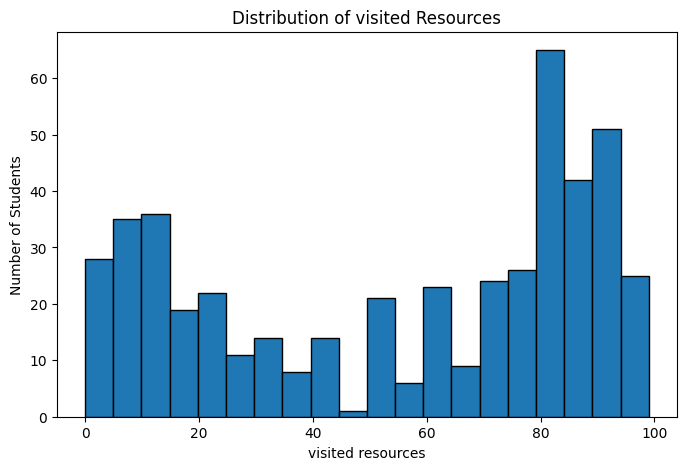

In [41]:
# Histogram: Distribution of study hours
plt.figure(figsize=(8,5))
plt.hist(df['VisITedResources'], bins=20, edgecolor='black')
plt.title('Distribution of visited Resources')
plt.xlabel('visited resources')
plt.ylabel('Number of Students')
plt.show()

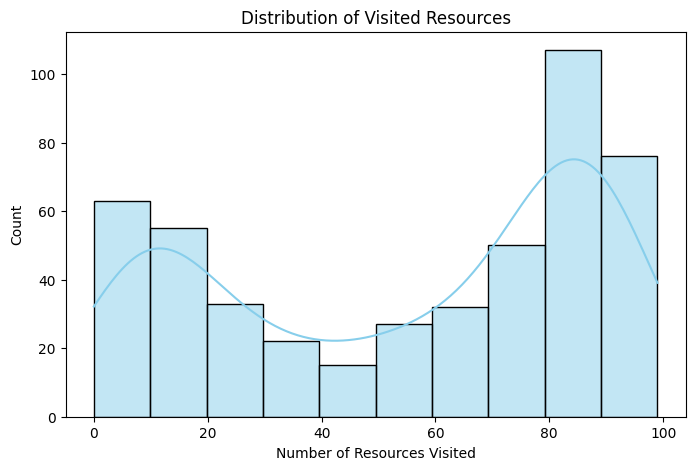

In [63]:
# Histogram of VisITedResources
# -----------------------------
# Purpose: Show the distribution of how many resources students visited.
plt.figure(figsize=(8,5))
sns.histplot(df['VisITedResources'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Visited Resources')
plt.xlabel('Number of Resources Visited')
plt.ylabel('Count')
plt.show()



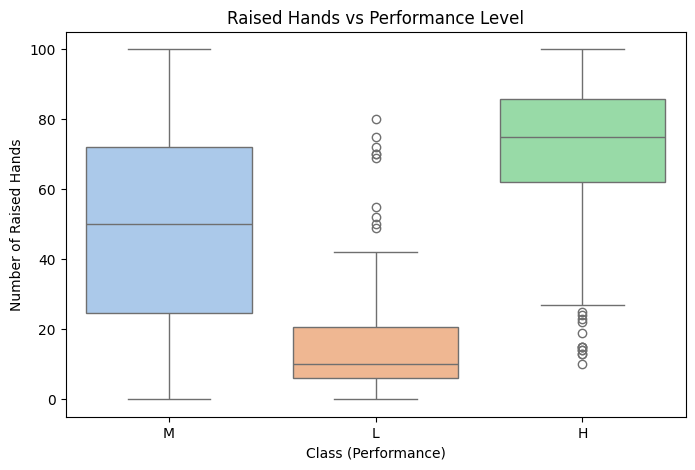

In [62]:
#Boxplot of raisedhands vs Class
# -----------------------------
# Purpose: Compare student participation across performance levels and detect outliers.
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='raisedhands', data=df, palette='pastel',hue="Class")
plt.title('Raised Hands vs Performance Level')
plt.xlabel('Class (Performance)')
plt.ylabel('Number of Raised Hands')
plt.show()


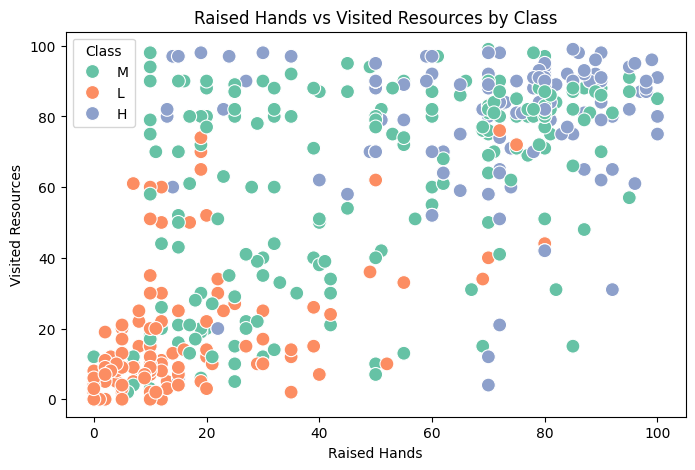

In [61]:
#Scatterplot of raisedhands vs VisITedResources
# -----------------------------
# Purpose: Visualize the relationship between participation and resource visits, colored by performance.
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='raisedhands',
    y='VisITedResources',
    hue='Class',
    data=df,
    palette='Set2',
    s=100
)
plt.title('Raised Hands vs Visited Resources by Class')
plt.xlabel('Raised Hands')
plt.ylabel('Visited Resources')
plt.legend(title='Class')
plt.show()

